## Linear Regression: Machine Learning
<b>By: Sabyasachi Parida</b>

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:

we are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1. Reading and understanding Data 

In [1]:
# Suppress Warnings
## Import the libraries that are going to be used
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
## Import the data 
Bikes = pd.read_csv(r"D:\Data Science\Study material\UpGrad\Machine Learning -1\Bike Sharing Assignment\day.csv")# replace as per data source
# Check the head of the dataset
Bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#inspect the asspects 
Bikes.shape ## The dataset has 730 rows and 16 columns

(730, 16)

In [4]:
Bikes.info() # It doesnt have any nullable columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
Bikes.describe() ## Getting the sense of mean median etc

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Dropping columns (unnecessary variables)
Upon inspection we found that the following columns can be dropped as they do not contribute much to the analysis or some other column can be used instead of that .
- instant
- dteday
- casual
- registered



In [6]:
# Create a list of unnecessary variables\columns 
unwanted=['instant','dteday','casual','registered']

#and drop them 
Bikes.drop(labels = unwanted , axis=1, inplace= True )

In [7]:
#Inspect the dataframe again 
Bikes.shape

(730, 12)

In [8]:
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## 3. Identifying the type of variable and Visualize the data 

### 3.1 Identify the type of variable

In [9]:
## Take the value_counts just infer and know about the 
for col in Bikes.columns:
    print(col) 
    Bikes[col].value_counts()
    


season


3    188
2    184
1    180
4    178
Name: season, dtype: int64

yr


1    365
0    365
Name: yr, dtype: int64

mnth


12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

holiday


0    709
1     21
Name: holiday, dtype: int64

weekday


6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

workingday


1    499
0    231
Name: workingday, dtype: int64

weathersit


1    463
2    246
3     21
Name: weathersit, dtype: int64

temp


10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64

atemp


32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24.93625    1
32.73460    1
14.82130    1
9.31250     1
Name: atemp, Length: 689, dtype: int64

hum


61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.0417    1
49.8750    1
Name: hum, Length: 594, dtype: int64

windspeed


7.416900     3
15.333486    3
7.959064     3
11.166689    3
7.125450     3
            ..
14.500475    1
8.250514     1
19.416332    1
16.522200    1
9.750175     1
Name: windspeed, Length: 649, dtype: int64

cnt


5119    2
4274    2
3784    2
6883    2
2077    2
       ..
6273    1
5501    1
4760    1
1683    1
4097    1
Name: cnt, Length: 695, dtype: int64

The following are the columns that are classified as categorical, numerical and binary variables 
- Categorical
    - Season
    - month
    - Weekday
    - weathersit
- Numerical 
    - temp
    - atemp
    - hum
    - windspeed
- Binary
    - year
    - holiday
    - workingday

### 3.2 Converting the data as per the data dictionary 


#### 3.2.1. season

In [10]:
def Season_map(x):
    return x.map({"1":"spring", "2":"summer", "3":"fall", "4":"winter"})

In [11]:
Bikes.season=Bikes.season.astype(str)
Bikes[["season"]]=Bikes[["season"]].apply(Season_map)

In [12]:
Bikes.season.value_counts() # Check if the conversion was successful or not 

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

#### 3.2.2 mnth

In [13]:
def month_map(x):
    return x.map({"1":"Jan","2":"Feb","3":"Mar","4":"Apr","5":"May","6":"Jun","7":"Jul","8":"Aug","9":"Sep"
                  ,"10":"Oct","11":"Nov","12":"Dec"})

In [14]:
Bikes.mnth=Bikes.mnth.astype(str)
Bikes[["mnth"]]=Bikes[["mnth"]].apply(month_map)

In [15]:
Bikes.mnth.value_counts() # Check if the conversion was successful or not 

Oct    62
Jul    62
Aug    62
Dec    62
Mar    62
Jan    62
May    62
Sep    60
Apr    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64

#### 3.2.3 Weekday

In [16]:
def Weekday_map(x):
    return x.map({"1":"Mon","2":"Tue","3":"Wed","4":"Thu","5":"Fri","6":"Sat","0":"Sun"})
Bikes.weekday=Bikes.weekday.astype(str)
Bikes[["weekday"]]=Bikes[["weekday"]].apply(Weekday_map)
Bikes.weekday.value_counts()

Sat    105
Mon    105
Sun    105
Tue    104
Fri    104
Thu    104
Wed    103
Name: weekday, dtype: int64

In [99]:
Bikes.info() # infering the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
spring        730 non-null uint8
summer        730 non-null uint8
winter        730 non-null uint8
Aug           730 non-null uint8
Dec           730 non-null uint8
Feb           730 non-null uint8
Jan           730 non-null uint8
Jul           730 non-null uint8
Jun           730 non-null uint8
Mar           730 non-null uint8
May           730 non-null uint8
Nov           730 non-null uint8
Oct           730 non-null uint8
Sep           730 non-null uint8
Mon           730 non-null uint8
Sat           730 non-null uint8
Sun           730 non-null uint8
Thu           730 non-null uint8
Tue           730 non-null uint8
Wed           730 non-null uint8
Light_Snow    730 non-null uint

#### 3.2.4.weathersit 

In [18]:
def weathersit_map(x):
    return x.map({"1":"Clear","2":"Mist","3":"Light_Snow","4":"Heavy_Rain"})
Bikes.weathersit=Bikes.weathersit.astype(str)
Bikes[["weathersit"]]=Bikes[["weathersit"]].apply(weathersit_map)
Bikes.weathersit.value_counts()

Clear         463
Mist          246
Light_Snow     21
Name: weathersit, dtype: int64

#### 3.2.5.Year 

In [19]:
def yr_map(x):
    return x.map({0:2018,1:2019})

Bikes[["yr"]]=Bikes[["yr"]].apply(yr_map)
Bikes.yr.value_counts()

2019    365
2018    365
Name: yr, dtype: int64

### 3.3 Visualize Data to get some inference 

In [20]:
# import the libraries for visualizing
import matplotlib.pyplot as plt
import seaborn as sns

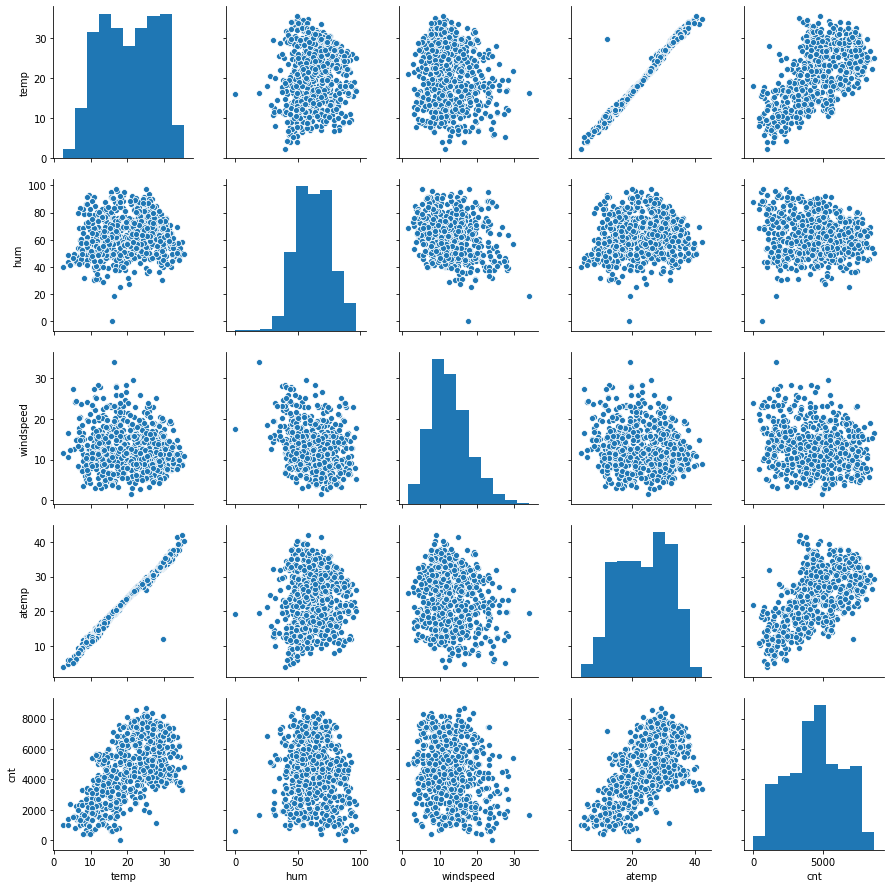

In [21]:
# Lets make a pairplot for numerical variables 
numVar= Bikes[["temp","hum","windspeed",'atemp','cnt']]
sns.pairplot(numVar)
plt.show();

### observations
- temp and atemp seem to be exhibit the property of multicollinearity hence we can take any one of them in our analysis 
- If we observe the cnt with respect to other variables we can see there are not much outliers .

<Figure size 1152x720 with 0 Axes>

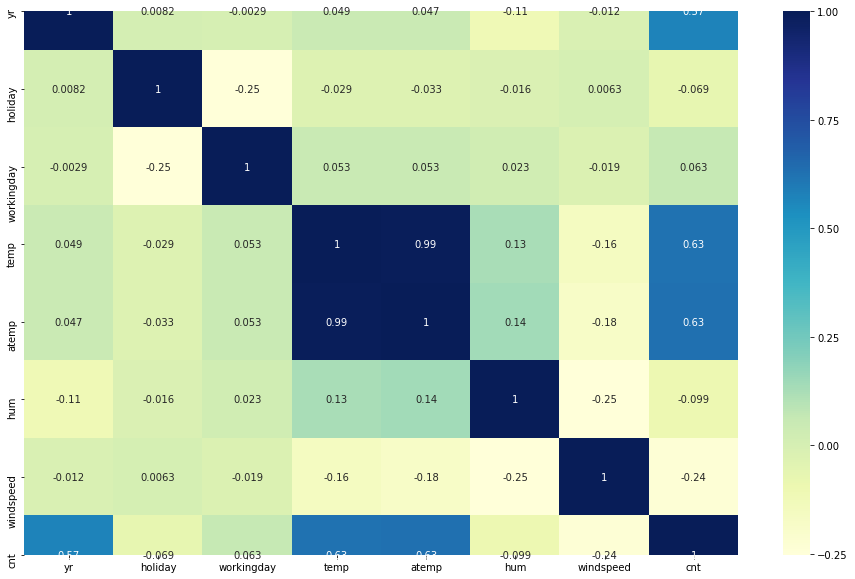

In [22]:
## Plot the coorelation 
plt.figure(figsize = (16, 10))
sns.heatmap(Bikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [23]:
## Both atemp and temp  exibit the same coorelation with cnt 
##Hence we can drop any one of them 
# Dropping atemp 
Bikes.drop(labels = 'atemp' , axis=1, inplace= True )

In [24]:
Bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### 3.4 Univariate analysis 

#### 3.4.1  Visualize the categorical values 

<Figure size 720x720 with 0 Axes>

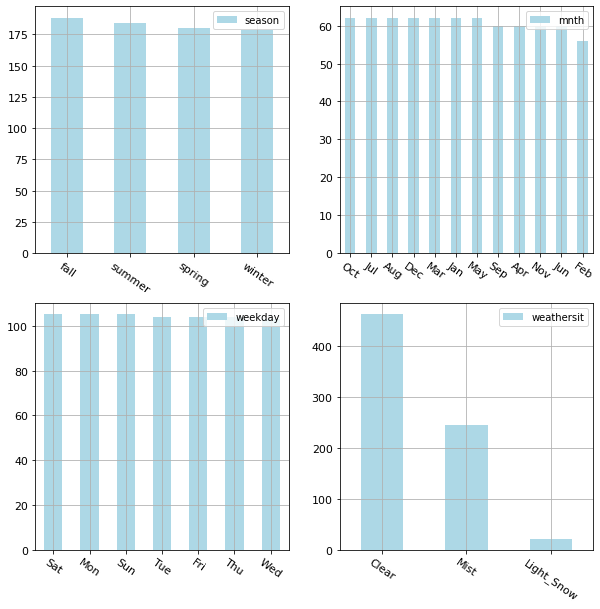

In [25]:

CatVal= ['season','mnth','weekday','weathersit']

index=1
plt.figure(figsize=(10, 10))
for vals in CatVal:
    plt.subplot(2, 2, index)
    Bikes[vals].value_counts().plot(kind='bar',rot=-35,color='lightblue',legend=True,fontsize=11,grid=True);
    index= index+1

#### Observations

- The dataframe has less data for light_snow
- Apart from that there seems to be approximatly equal data for all weather,weekday,month

#### 3.4.2  Visualize data for numerical values

In [26]:
## defined a function sucj that we do not need to write the same code again and again 
def variate(df,col): 
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    '''
    sns.set(style="whitegrid")
    fig, ax=plt.subplots(nrows =1,ncols=1,figsize=(10,8))
    ax.set_title("Distribution Plot ")
    sns.distplot(df[col],color='green')
    
    plt.show()
    
    

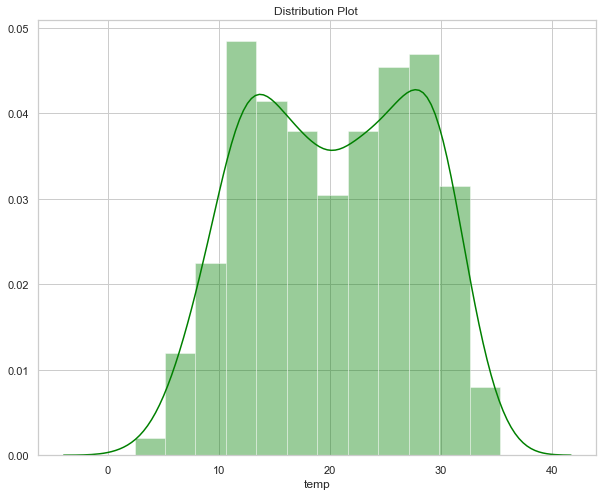

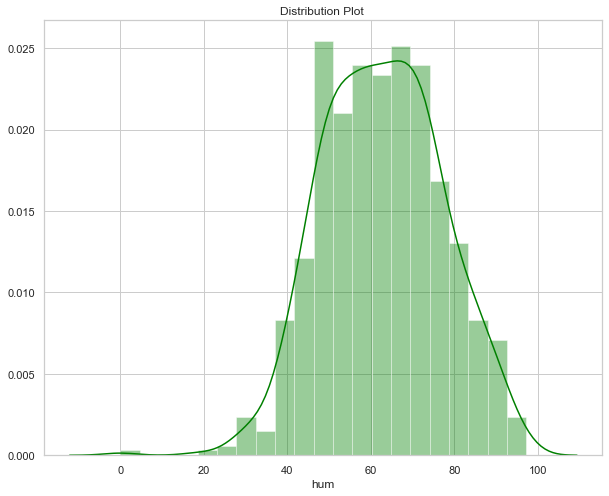

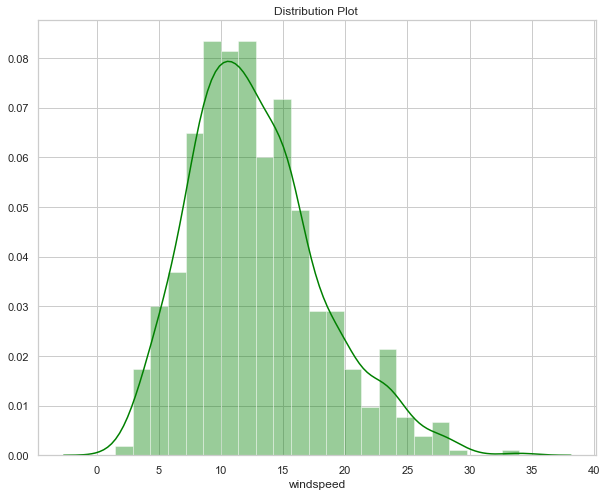

In [27]:
NumVars=['temp','hum','windspeed']

for numvar in NumVars:
    variate(Bikes,numvar)


#### Observations 
    - all the variables show approximate normal distribution
    - windspeed is skewed towards right 
    - most of the temperature distribution is in between 10-30 .

#### 3.4.3 Visualise data for binary variables 

<Figure size 720x720 with 0 Axes>

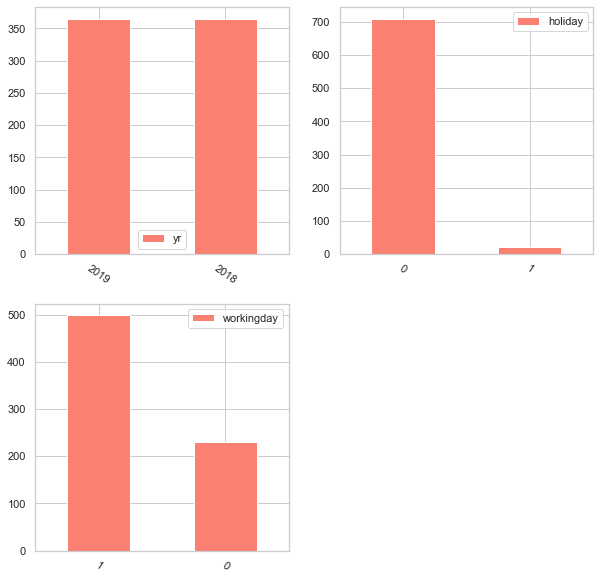

In [28]:
BinVal= ['yr','holiday','workingday']

index=1
plt.figure(figsize=(10, 10))
for vals in BinVal:
    plt.subplot(2, 2, index)
    Bikes[vals].value_counts().plot(kind='bar',rot=-35,color='salmon',legend=True,fontsize=11,grid=True);
    index= index+1

#### Observations:
    - The data set has data related to 2018,2019 equally 

### 3.5 bivariate analysis 

#### 3.5.1 Bivariate for Categorical values 

<Figure size 1080x1080 with 0 Axes>

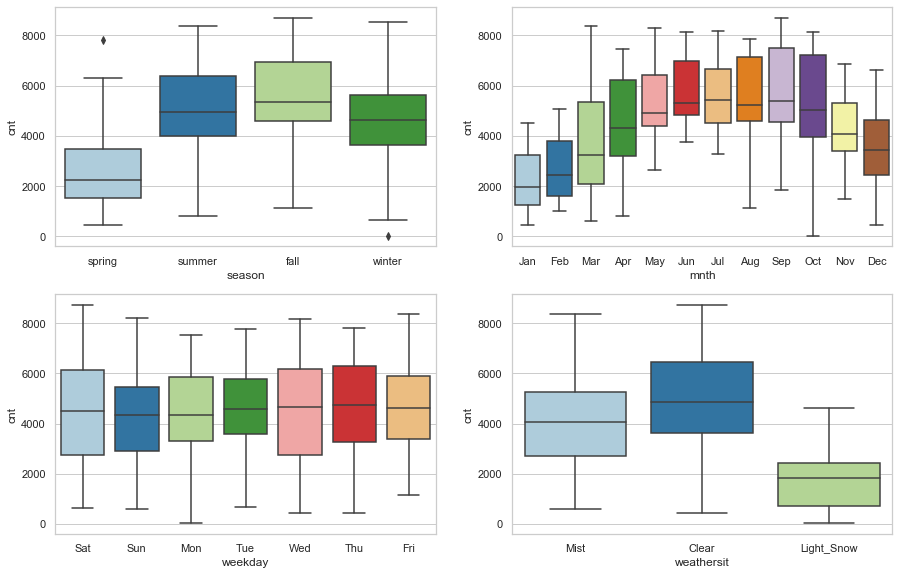

In [29]:

## lets make box plots with the target variable(cnt) now 
index=1
plt.figure(figsize=(15, 15))
for vals in CatVal:
    plt.subplot(3, 2, index)
    sns.boxplot(x = vals , y = 'cnt', data = Bikes,palette='Paired')
    index= index+1


#### Observations

- The Median count is more in fall
- The median count is more in July and september
- Thursday and Saturday have more count 
- The count is more in Clear Weathersit

#### 3.5.2 Bivariate for Numerical variables  with respect to Count

In [30]:
def num_variate(df,col): 
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    '''
    sns.set(style="whitegrid")
    fig, ax=plt.subplots(nrows =1,ncols=1,figsize=(10,8))
    ax.set_title("Scatter Plot ")
    sns.scatterplot(x=df[col],y='cnt',hue='yr',data=df,palette='Dark2')
    
    plt.show()

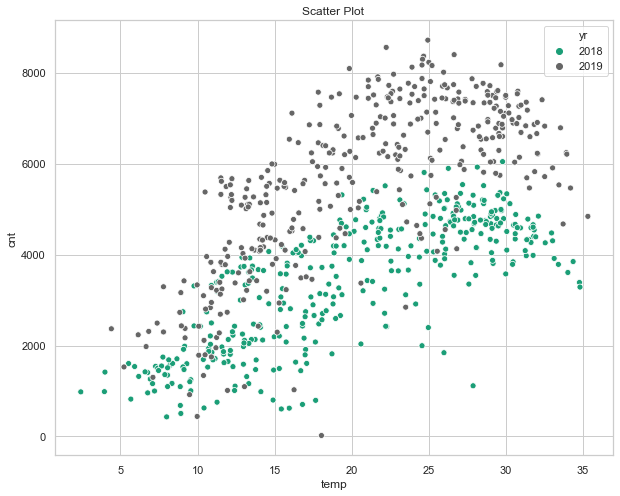

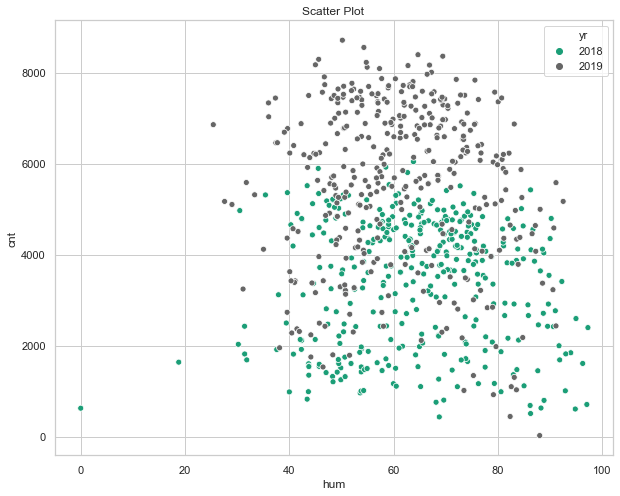

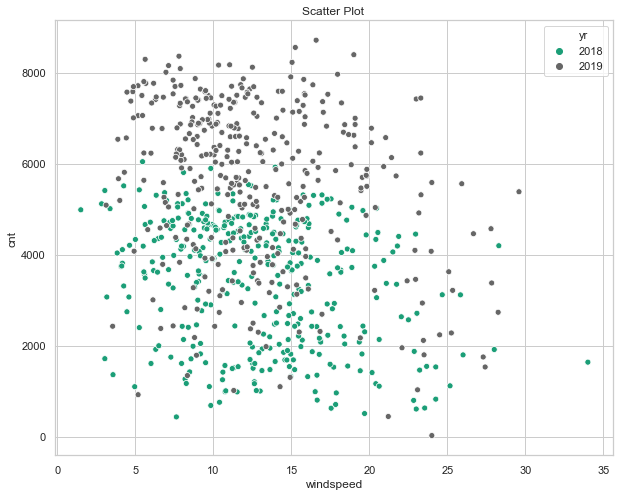

In [31]:
for vals in NumVars:
    num_variate(Bikes,vals)

#### Observations
    - The count has incereased in 2019 as compared to 2018
    - There are few outliers but that doenst seem to have occured because of data entry or manual error hence we will not be imputing them .


#### 3.5.3 Visualization for Categorical variables with cnt (wrt Year)

Text(-0.30000000000000004, 91, '12.3%')

Text(0.7000000000000001, 93, '12.6%')

Text(1.7000000000000002, 95, '12.9%')

Text(2.6999999999999997, 90, '12.2%')

Text(0.09999999999999998, 91, '12.3%')

Text(1.0999999999999999, 93, '12.6%')

Text(2.1, 95, '12.9%')

Text(3.1, 90, '12.2%')

Text(-0.30000000000000004, 32, '4.2%')

Text(0.7000000000000001, 29, '3.8%')

Text(1.7000000000000002, 32, '4.2%')

Text(2.6999999999999997, 31, '4.1%')

Text(3.6999999999999997, 32, '4.2%')

Text(4.699999999999999, 31, '4.1%')

Text(5.699999999999999, 32, '4.2%')

Text(6.699999999999999, 32, '4.2%')

Text(7.699999999999999, 31, '4.1%')

Text(8.700000000000001, 32, '4.2%')

Text(9.700000000000001, 31, '4.1%')

Text(10.700000000000001, 32, '4.2%')

Text(0.09999999999999998, 32, '4.2%')

Text(1.0999999999999999, 29, '3.8%')

Text(2.1, 32, '4.2%')

Text(3.1, 31, '4.1%')

Text(4.1, 32, '4.2%')

Text(5.1, 31, '4.1%')

Text(6.1, 32, '4.2%')

Text(7.1, 32, '4.2%')

Text(8.1, 31, '4.1%')

Text(9.1, 32, '4.2%')

Text(10.1, 31, '4.1%')

Text(11.1, 32, '4.2%')

Text(-0.30000000000000004, 54, '7.3%')

Text(0.7000000000000001, 53, '7.1%')

Text(1.7000000000000002, 53, '7.1%')

Text(2.6999999999999997, 53, '7.1%')

Text(3.6999999999999997, 53, '7.1%')

Text(4.699999999999999, 53, '7.1%')

Text(5.699999999999999, 53, '7.1%')

Text(0.09999999999999998, 53, '7.1%')

Text(1.0999999999999999, 54, '7.3%')

Text(2.1, 54, '7.3%')

Text(3.1, 53, '7.1%')

Text(4.1, 52, '7.0%')

Text(5.1, 53, '7.1%')

Text(6.1, 53, '7.1%')

Text(-0.30000000000000004, 125, '17.0%')

Text(0.7000000000000001, 227, '31.0%')

Text(1.7000000000000002, 16, '2.1%')

Text(0.09999999999999998, 123, '16.7%')

Text(1.0999999999999999, 238, '32.5%')

Text(2.1, 7, '0.8%')

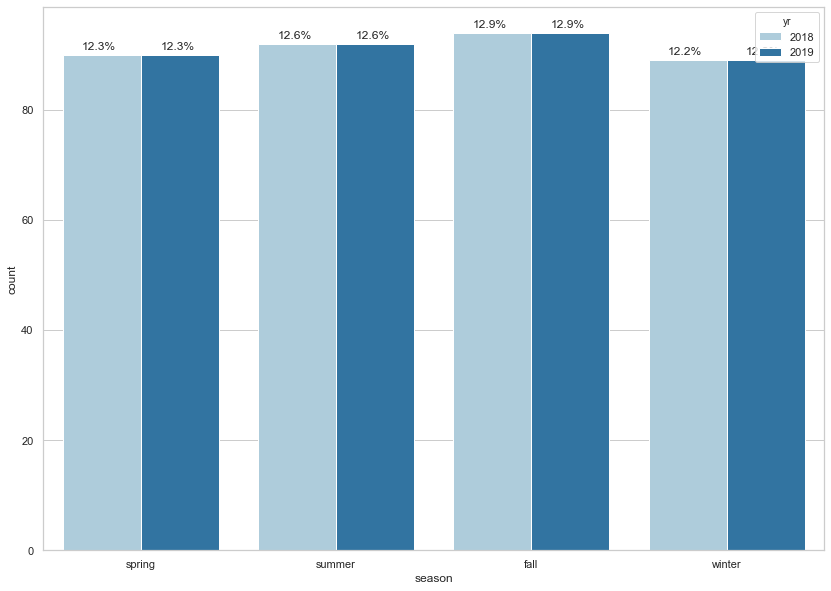

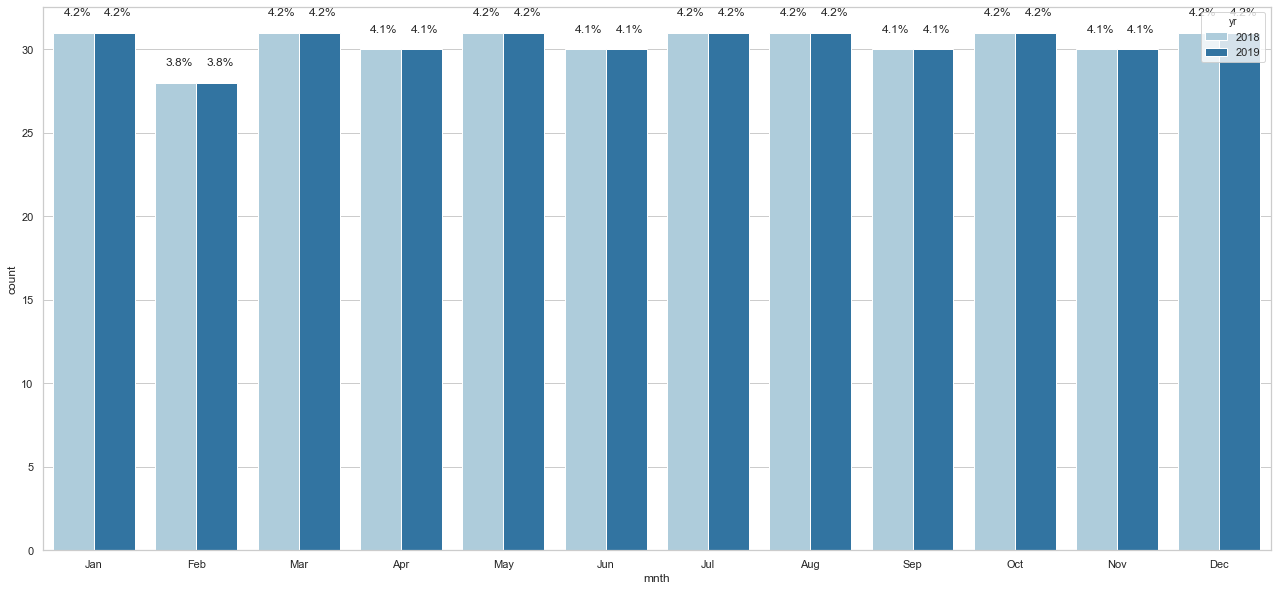

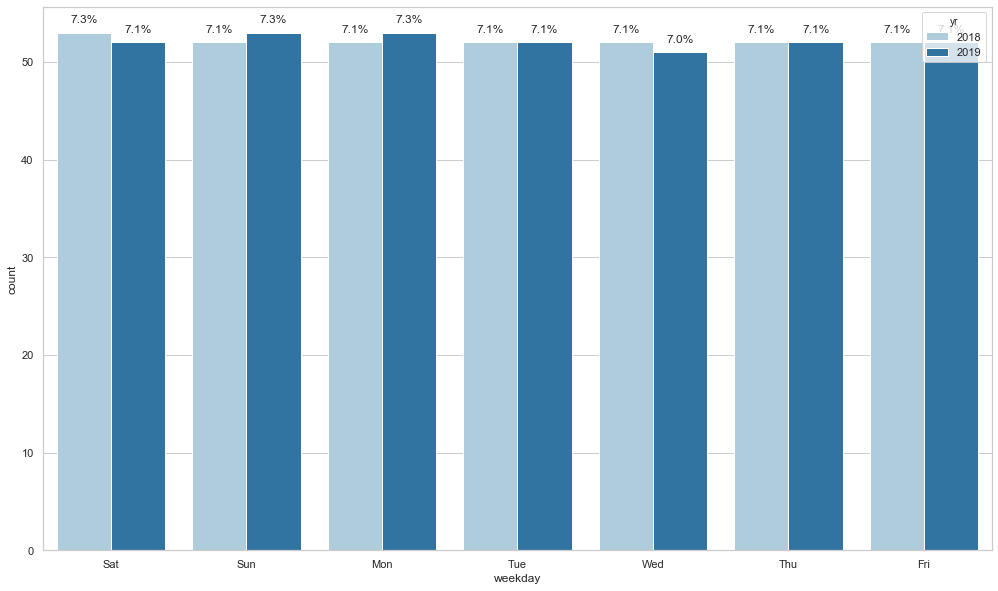

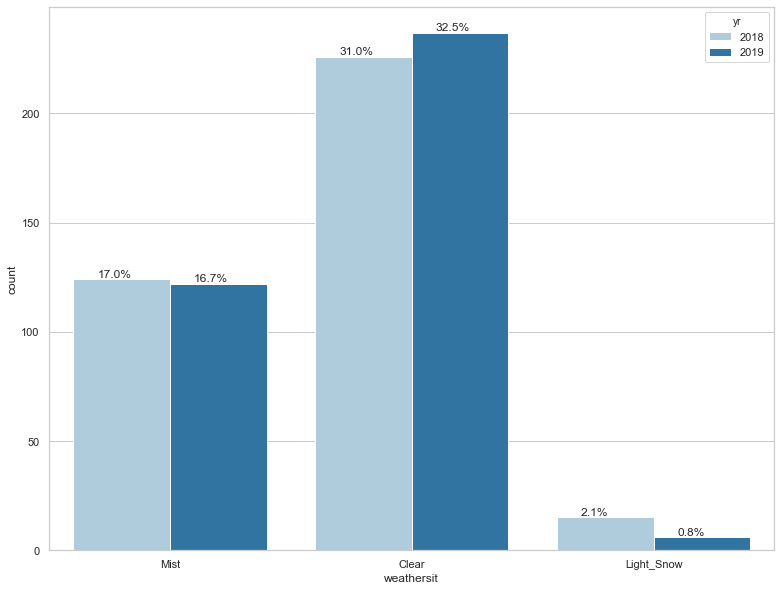

In [32]:
index=1
for vals in CatVal:
    temp = pd.Series(data = 'yr')
    fig, ax = plt.subplots()
    width = len(Bikes[vals].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 10)
    ax=sns.countplot(data = Bikes, x = vals, hue = 'yr',palette='Paired')
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height())*100/float(len(Bikes.index))), (p.get_x()+ 0.1, p.get_height()+1))
    index= index+1

#### Observation 
    - The cunt is more in bot the years for Clear Weathersit and lowest in Light snow .
    - Feb has the lowest count 
    - Sun and Mon have heigher count in 2019
    - Fall has heighest count for both the years 

### 3.6 MultiVariate Analysis 

<Figure size 1440x1440 with 0 Axes>

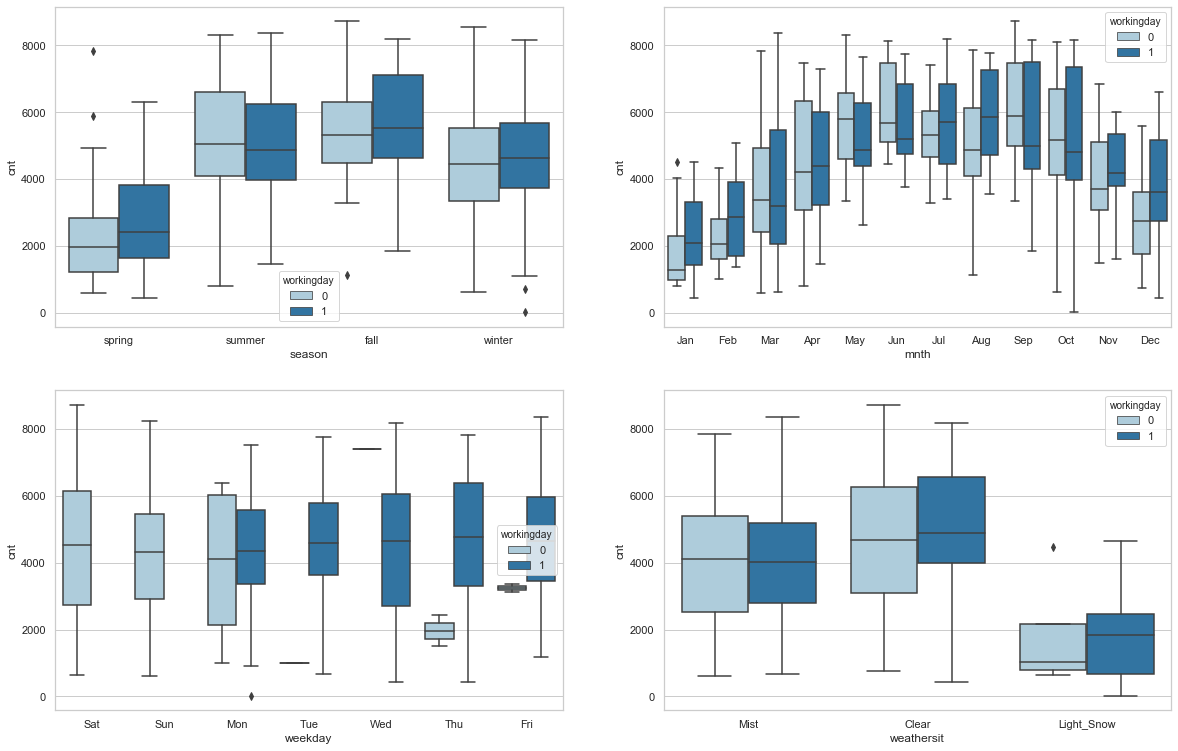

In [33]:
## Lets visualize these categorical values with hue 

##workingday,holiday,year

#hue Workingday 
index=1
plt.figure(figsize=(20, 20))
for vals in CatVal:
    plt.subplot(3, 2, index)
    sns.boxplot(x = vals , y = 'cnt',hue='workingday', data = Bikes,palette='Paired')
    index= index+1


#### Observation
- In summer the count was more on workingday 
- In all other seasons the count was more on non workingday
- Apart from April , May , June the count was more on non workingday
- In Clear weather the median count was more than other weathersit for both working day and non working day 


<Figure size 1440x1440 with 0 Axes>

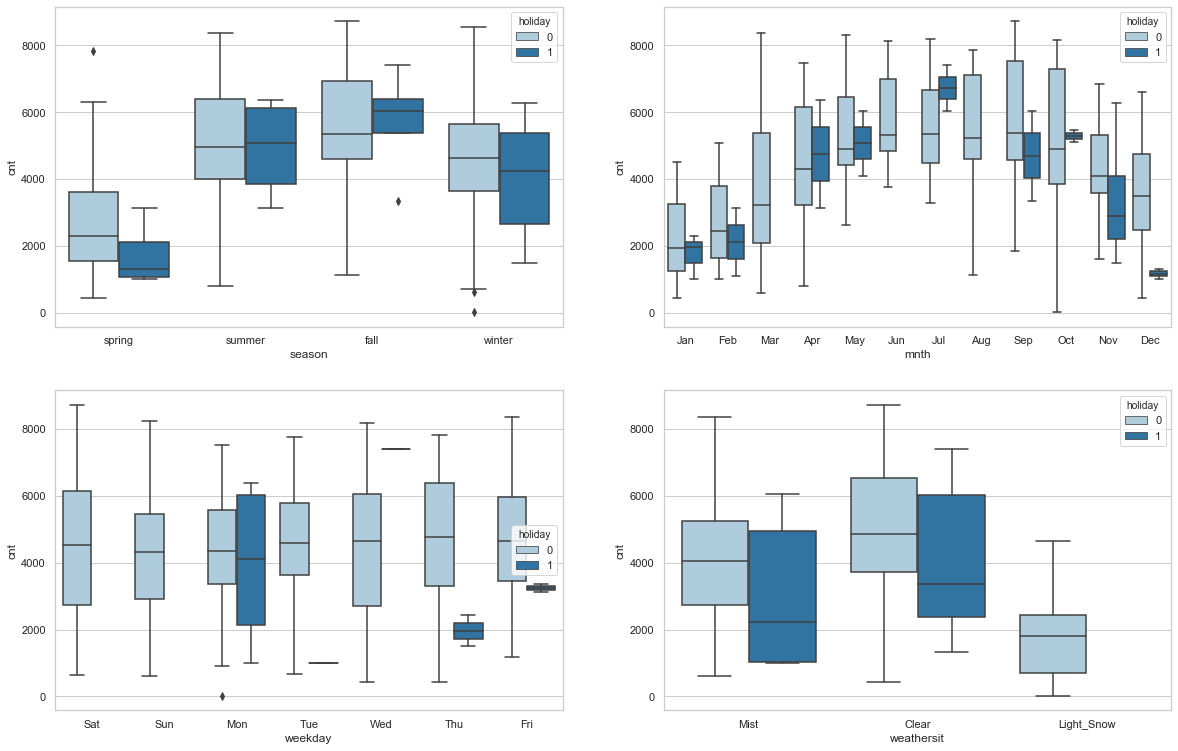

In [34]:
#observe with hue  as holiday 

index=1
plt.figure(figsize=(20, 20))
for vals in CatVal:
    plt.subplot(3, 2, index)
    sns.boxplot(x = vals , y = 'cnt',hue='holiday', data = Bikes,palette='Paired');
    index= index+1


#### observation 
- In Light_snow there was count if it was not a holiday


<Figure size 1440x1440 with 0 Axes>

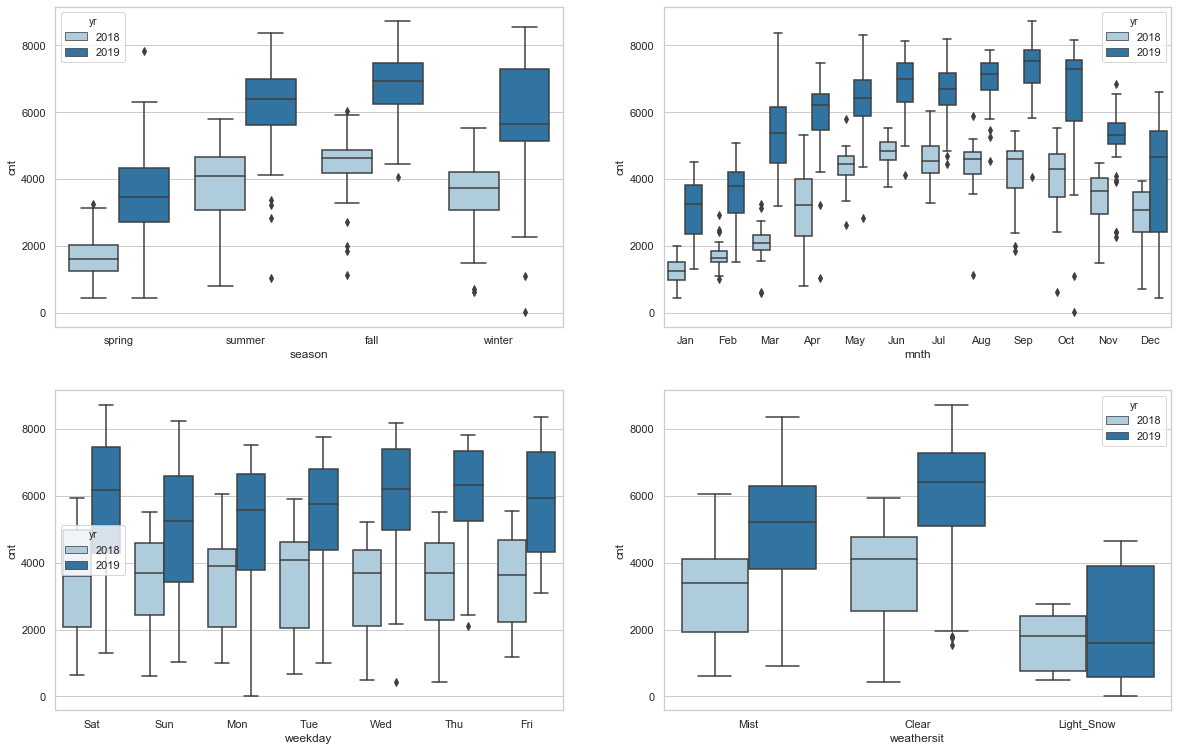

In [35]:
#observe with hue  as yr 

index=1
plt.figure(figsize=(20, 20))
for vals in CatVal:
    plt.subplot(3, 2, index)
    sns.boxplot(x = vals , y = 'cnt',hue='yr', data = Bikes,palette='Paired')
    index= index+1

#### Observations
- The median count was more on 2019 for all season,month,weekday but for weathersit light_snow 

## 4. Data Preparation 

In [36]:
## inspect the dataframe again 
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### 4.1 Create Dummy variables for all categorical features 

In [37]:
CatVal ## List the categorical features 

['season', 'mnth', 'weekday', 'weathersit']

When we have categorical variables with n levels, n-1 dummy variables would be enough to represent them .

#### 4.1.1 Creating Dummy for Season 

In [38]:
seasons = pd.get_dummies(Bikes['season'], drop_first = True)

In [39]:
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### 4.1.2 Creating Dummy for mnth 

In [40]:
Months = pd.get_dummies(Bikes['mnth'], drop_first = True)
Months.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


#### 4.1.3 Creating Dummy for weekday 

In [41]:
weekdays = pd.get_dummies(Bikes['weekday'], drop_first = True)
weekdays.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


#### 4.1.4 Creating Dummy for weathersit 

In [42]:
weathersitu = pd.get_dummies(Bikes['weathersit'], drop_first = True)
weathersitu.head()

,Light_Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


#### 4.1.5 Creating Dummy for yr 

In [43]:
yrs = pd.get_dummies(Bikes['yr'], drop_first = True)
yrs.head()

,2019
0,0
1,0
2,0
3,0
4,0


### 4.2 Concatinate the dummy variables 

In [44]:
Bikes = pd.concat([Bikes,seasons,Months,weekdays,weathersitu,yrs], axis = 1)
Bikes.head()
CatVal.append('yr')
CatVal

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist,2019
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,0,0,1,0
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,1,0,0,0,0,0,0,0,0
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,1,0,0,0


['season', 'mnth', 'weekday', 'weathersit', 'yr']

In [45]:
## Dropping the colums for which Dummies are created 
Bikes.drop(CatVal,axis = 1, inplace = True)


In [46]:
Bikes.info() # inspecting the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
spring        730 non-null uint8
summer        730 non-null uint8
winter        730 non-null uint8
Aug           730 non-null uint8
Dec           730 non-null uint8
Feb           730 non-null uint8
Jan           730 non-null uint8
Jul           730 non-null uint8
Jun           730 non-null uint8
Mar           730 non-null uint8
May           730 non-null uint8
Nov           730 non-null uint8
Oct           730 non-null uint8
Sep           730 non-null uint8
Mon           730 non-null uint8
Sat           730 non-null uint8
Sun           730 non-null uint8
Thu           730 non-null uint8
Tue           730 non-null uint8
Wed           730 non-null uint8
Light_Snow    730 non-null uint

### 4.2 Split the Data into Training and Testing Sets 

In [47]:
from sklearn.model_selection import train_test_split # importing the required library

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


### 4.3 Perform Scaling

We will proceed with min max scaling 

In [48]:
from sklearn.preprocessing import MinMaxScaler # importing the required library

In [49]:
scaler = MinMaxScaler()

In [50]:
NumVars # Listing the num vars

['temp', 'hum', 'windspeed']

In [51]:
## Scaling all columns except the dummy variables and binary variables 
df_train[NumVars] = scaler.fit_transform(df_train[NumVars])

In [52]:
df_train.head() # inspect the head

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist,2019
653,0,1,0.509887,0.575354,0.300794,7534,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
576,0,1,0.815169,0.725633,0.264686,7216,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
426,0,0,0.442393,0.640189,0.255342,4066,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
728,0,0,0.245101,0.498067,0.663106,1796,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,4220,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1


In [53]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist,2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,0.096078,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.507843
std,0.157763,0.468282,0.225844,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,0.294988,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1440x1440 with 0 Axes>

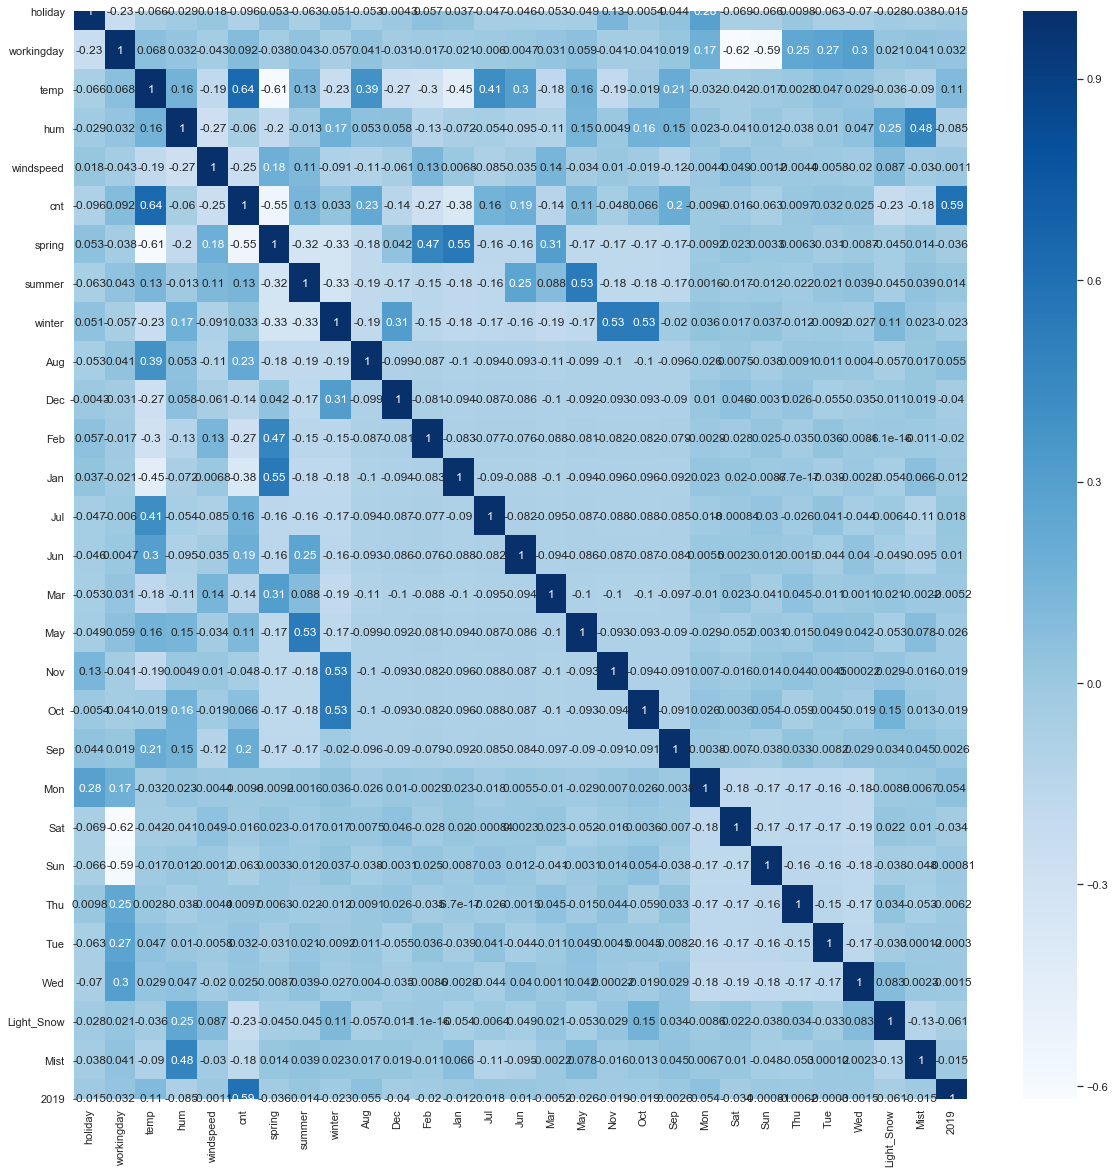

In [54]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="Blues")
plt.show() ## Plot to see the corelation and find the heighest corelated value

#### Observation:
   1.  `cnt` is highly correlated to `temp` , lets pair plot  `temp` vs `cnt`

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, 'temp')

Text(0, 0.5, 'cnt')

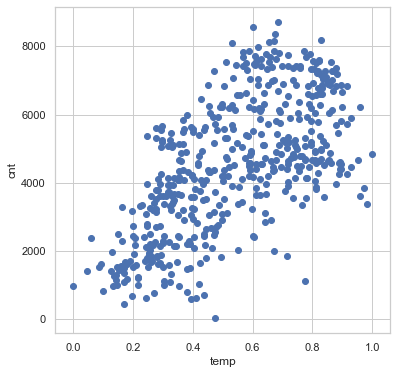

In [55]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel("temp")
plt.ylabel("cnt")
plt.show()

## 4.4 Divide the data into X and y.

In [56]:
y_train = df_train.pop('cnt') ## Popping cnt as that is the target variable 
X_train = df_train

## 5. Model Building

In [57]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### 5.1 Creating a model with RFE

In [58]:
lm = LinearRegression()
lm.fit(X_train,y_train)

## Run the rfe for no. of output equal to 10
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 11),
 ('Tue', False, 7),
 ('Wed', False, 12),
 ('Light_Snow', True, 1),
 ('Mist', True, 1),
 (2019, True, 1)]

In [60]:
# Create the list of columns which has rfe.support_ as True 
col = X_train.columns[rfe.support_]
col

Index([   'holiday', 'workingday',       'temp',        'hum',  'windspeed',
           'spring',     'summer',     'winter',        'Jan',        'Jul',
              'Sep',        'Sat', 'Light_Snow',       'Mist',         2019],
      dtype='object')

## 5.2 Manual inspection using stats model and fine tuning the model 

In [61]:
# Import the required library 
import statsmodels.api as sm

 Creating the training dataset after rfe (with the selected columns after rfe)

In [62]:
X_train_rfe = X_train[col]

In [63]:
#Inspecting the X_train_rfe dataframe 
X_train_rfe.head()

,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Sep,Sat,Light_Snow,Mist,2019
653,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,1
576,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,1
426,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1,1
728,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1,1


In [64]:
## Adding the constant as the stats model assumes the line passes through the origin if we dont add the constant 
X_train_rfe = sm.add_constant(X_train_rfe) 

In [65]:
lm = sm.OLS(y_train,X_train_rfe).fit() # just for the selected variables 

In [66]:
lm.summary() # get the summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        22:51:49   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2204.0556    314.032      7.019      0.000    1587.052    2821.059
holiday     -508.7381    233.568     -2.178      0.030    -967.646     -49.830
workingday   378.2822    100.057      3.781      0.000     181.693     574.872
temp        4431.4973    298.389     14.851      0.000    3845.228    5017.766
hum        -1344.7934    324.457     -4.145      0.000   -1982.280    -707.307
windspeed  -1616.3289    221.379     -7.301      0.000   -2051.289   -1181.369
spring      -441.6037    179.462     -2.461      0.014    -794.207     -89.001
summer       431.6424    129.004      3.346      0.001     178.177     685.107
winter       820.7507    149.808      5.479      0.000     526.411    1115.090
Jan         -298.3585    150.718     -1.980      0.048    -594.486      -2.231
Jul         -462.3542    156.871     -2.947      0.003    -770.570    -154.138
Sep          705.6663    143.010      4.934      0.000     424.684     986.648
Sat          466.9445    125.957      3.707      0.000     219.467     714.422
Light_Snow -2162.3728    226.178     -9.560      0.000   -2606.763   -1717.983
Mist        -502.6064     90.177     -5.574      0.000    -679.784    -325.429
2019        2003.5240     69.550     28.807      0.000    1866.873    2140.175
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
6,spring,5.08
3,temp,3.89
8,winter,3.60
7,summer,2.64
4,hum,1.92
2,workingday,1.88
12,Sat,1.78
9,Jan,1.57
14,Mist,1.57


#### Observation :
    1. R-squared: 0.849
    2. Adj. R-squared:0.844
        
seems to be a decent model .
But we will try to do manual feature selection now 


### 5.2.1 Dropping Jan as it has high P value 

In [68]:
X_train_rfe_1 = X_train_rfe.drop(["Jan"], axis = 1)

In [69]:
X_train_rfe_1 = sm.add_constant(X_train_rfe_1) 
lm = sm.OLS(y_train,X_train_rfe_1).fit() # just for the selected variables 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        22:51:49   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2102.6839    310.741      6.767      0.000    1492.150    2713.218
holiday     -516.6007    234.221     -2.206      0.028    -976.791     -56.410
workingday   375.6335    100.342      3.744      0.000     178.484     572.783
temp        4587.8062    288.600     15.897      0.000    4020.775    5154.837
hum        -1386.0907    324.739     -4.268      0.000   -2024.127    -748.054
windspeed  -1569.7802    220.774     -7.110      0.000   -2003.550   -1136.010
spring      -481.8292    178.833     -2.694      0.007    -833.194    -130.464
summer       457.3112    128.729      3.553      0.000     204.389     710.234
winter       871.7572    148.010      5.890      0.000     580.952    1162.563
Jul         -477.0247    157.157     -3.035      0.003    -785.802    -168.248
Sep          710.7672    143.407      4.956      0.000     429.005     992.529
Sat          462.4406    126.307      3.661      0.000     214.276     710.605
Light_Snow -2141.1185    226.588     -9.449      0.000   -2586.312   -1695.925
Mist        -502.8092     90.442     -5.559      0.000    -680.507    -325.112
2019        1996.8832     69.674     28.660      0.000    1859.991    2133.776
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
X = X_train_rfe_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.34
6,spring,5.02
3,temp,3.62
8,winter,3.49
7,summer,2.61
4,hum,1.91
2,workingday,1.88
11,Sat,1.78
13,Mist,1.57
9,Jul,1.49


#### Observations: 
    1. R-squared:0.847
    2. Adj. R-squared:0.843


### 5.2.2 Dropping holiday as it has higher P value 

In [71]:
X_train_rfe_2 = X_train_rfe_1.drop(["holiday"], axis = 1)
X_train_rfe_2 = sm.add_constant(X_train_rfe_2) 
lm = sm.OLS(y_train,X_train_rfe_2).fit() # just for the selected variables 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          8.51e-192
Time:                        22:51:49   Log-Likelihood:                -4110.4
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     496   BIC:                             8308.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2019.5931    309.648      6.522      0.000    1411.209    2627.977
workingday   452.4995     94.462      4.790      0.000     266.905     638.094
temp        4588.7034    289.721     15.838      0.000    4019.471    5157.936
hum        -1371.8523    325.937     -4.209      0.000   -2012.240    -731.464
windspeed  -1574.8666    221.621     -7.106      0.000   -2010.298   -1139.436
spring      -491.1307    179.478     -2.736      0.006    -843.762    -138.499
summer       460.3492    129.222      3.562      0.000     206.459     714.239
winter       863.4439    148.537      5.813      0.000     571.604    1155.284
Jul         -467.0397    157.703     -2.962      0.003    -776.887    -157.192
Sep          692.6977    143.730      4.819      0.000     410.303     975.092
Sat          540.3034    121.745      4.438      0.000     301.103     779.503
Light_Snow -2134.1764    227.447     -9.383      0.000   -2581.056   -1687.297
Mist        -500.4265     90.787     -5.512      0.000    -678.802    -322.051
2019        1998.8675     69.939     28.580      0.000    1861.455    2136.280
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
X = X_train_rfe_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.13
5,spring,5.02
2,temp,3.62
7,winter,3.49
6,summer,2.61
3,hum,1.91
1,workingday,1.65
10,Sat,1.64
12,Mist,1.57
8,Jul,1.49


#### Observation:
1. R-squared:0.846
2. Adj. R-squared:	0.842

### 5.2.3 Dropping Spring as it has higher P value and a little higher vif i.e 5.02

In [73]:
X_train_rfe_3 = X_train_rfe_2.drop(["spring"], axis = 1)
X_train_rfe_3 = sm.add_constant(X_train_rfe_3) 
lm = sm.OLS(y_train,X_train_rfe_3).fit() # just for the selected variables 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.26e-191
Time:                        22:51:49   Log-Likelihood:                -4114.2
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     497   BIC:                             8310.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1504.2480    247.394      6.080      0.000    1018.182    1990.314
workingday   457.8223     95.056      4.816      0.000     271.060     644.584
temp        5180.1904    194.171     26.678      0.000    4798.693    5561.688
hum        -1471.5655    326.001     -4.514      0.000   -2112.076    -831.055
windspeed  -1638.3852    221.836     -7.386      0.000   -2074.236   -1202.534
summer       708.5898     92.625      7.650      0.000     526.605     890.574
winter      1186.3707     90.792     13.067      0.000    1007.987    1364.754
Jul         -384.2484    155.780     -2.467      0.014    -690.317     -78.180
Sep          804.7843    138.666      5.804      0.000     532.341    1077.228
Sat          544.7952    122.526      4.446      0.000     304.062     785.528
Light_Snow -2089.8912    228.347     -9.152      0.000   -2538.535   -1641.247
Mist        -478.9270     91.035     -5.261      0.000    -657.788    -300.066
2019        1986.6542     70.250     28.280      0.000    1848.630    2124.678
==============================================================================
Omnibus:                       65.490   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.563
Skew:                          -0.687   Prob(JB):                     2.02e-33
Kurtosis:                       5.280   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
X = X_train_rfe_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
3,hum,1.89
1,workingday,1.65
9,Sat,1.64
2,temp,1.60
11,Mist,1.56
7,Jul,1.43
5,summer,1.33
6,winter,1.29
10,Light_Snow,1.24


#### Observation:
1. R-squared:0.844
2. Adj. R-squared:	0.840

In [75]:
X_train_rfe_4 = X_train_rfe_3.drop(["Jul"], axis = 1)
X_train_rfe_4 = sm.add_constant(X_train_rfe_4) 
lm = sm.OLS(y_train,X_train_rfe_4).fit() # just for the selected variables 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.89e-191
Time:                        22:51:49   Log-Likelihood:                -4117.3
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     498   BIC:                             8309.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1498.0851    248.641      6.025      0.000    1009.571    1986.599
workingday   465.5211     95.489      4.875      0.000     277.910     653.132
temp        4962.0848    173.749     28.559      0.000    4620.712    5303.457
hum        -1401.8639    326.428     -4.295      0.000   -2043.209    -760.518
windspeed  -1617.3921    222.801     -7.259      0.000   -2055.138   -1179.646
summer       781.5361     88.224      8.859      0.000     608.199     954.873
winter      1222.5460     90.056     13.575      0.000    1045.610    1399.483
Sep          891.2903    134.841      6.610      0.000     626.363    1156.217
Sat          548.0062    123.143      4.450      0.000     306.062     789.950
Light_Snow -2119.8904    229.184     -9.250      0.000   -2570.177   -1669.604
Mist        -480.7882     91.495     -5.255      0.000    -660.553    -301.023
2019        1994.2695     70.540     28.272      0.000    1855.677    2132.862
==============================================================================
Omnibus:                       72.653   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.950
Skew:                          -0.754   Prob(JB):                     3.39e-37
Kurtosis:                       5.372   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()
X = X_train_rfe_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
3,hum,1.87
1,workingday,1.65
8,Sat,1.64
10,Mist,1.56
2,temp,1.27
6,winter,1.25
9,Light_Snow,1.24
5,summer,1.19
4,windspeed,1.18


1. we will consider this model as our final model and will  proceed with evaluating the same we didn't consider the initial model even though it has heigher R squared as it had many variables and it would make the model bit complex.
2. The aim is to make the Model lean.
3. The P value of all X are very low and the VIF is also <5 


So we can consider this model to be a good model if the test R squareis not less than 5%





## 6. Residual analysis 

In [77]:
# fit the variables 
##lm = sm.OLS(y_train, X_train_rfe_4).fit()
y_train_pred= lm.predict(X_train_rfe_4)

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'Errors')

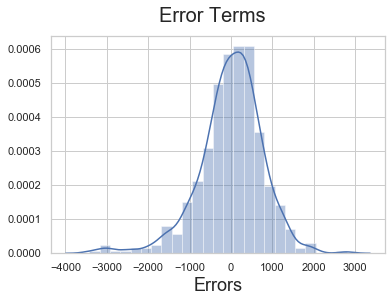

In [78]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

The errors seems to be normally distributed  

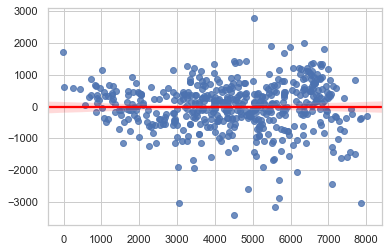

In [79]:
 # To see homosedasticity
sns.regplot(y_train_pred,(y_train - y_train_pred), line_kws={"color": "red"})

The residuals seems to be indepandent and the variance is uniform as well

In [95]:
(y_train - y_train_pred).describe() # Just to observer how the residuals are spread 

count    5.100000e+02
mean     4.624156e-12
std      7.768470e+02
min     -3.419344e+03
25%     -3.827456e+02
50%      7.389834e+01
75%      4.604830e+02
max      2.792643e+03
dtype: float64

## 7. Prediction and evaluation 


In [81]:
NumVars

['temp', 'hum', 'windspeed']

### 7.1 Scale the test df

In [82]:
## Scaling the numeric variable of dest data as well 
df_test[NumVars] = scaler.fit_transform(df_test[NumVars])

df_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist,2019
184,1,0,0.837241,0.534223,0.149393,6043,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
535,0,1,0.911423,0.470417,0.231142,6211,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
299,0,1,0.496221,0.777843,0.443398,2659,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
221,0,1,0.890387,0.236659,0.449707,4780,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,1,0.821739,0.070765,0.682387,4968,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
## 7.2 Pop and get the X and y 
y_test = df_test.pop('cnt')
X_test = df_test
print(y_test.shape)
print(X_test.shape)

(219,)
(219, 28)


In [84]:
## drop the columns as the training set 
X_test= X_test[col]
# dropping what ever was dropped mannually 
X_test= X_test.drop(["Jan","holiday","spring","Jul"],axis=1)

In [85]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,workingday,temp,hum,windspeed,summer,winter,Sep,Sat,Light_Snow,Mist,2019
184,1.0,0,0.837241,0.534223,0.149393,0,0,0,0,0,1,0
535,1.0,1,0.911423,0.470417,0.231142,1,0,0,0,0,0,1
299,1.0,1,0.496221,0.777843,0.443398,0,1,0,0,0,1,0
221,1.0,1,0.890387,0.236659,0.449707,0,0,0,0,0,0,0
152,1.0,1,0.821739,0.070765,0.682387,1,0,0,0,0,0,0


In [86]:
X_test_sm

,const,workingday,temp,hum,windspeed,summer,winter,Sep,Sat,Light_Snow,Mist,2019
184,1.0,0,0.837241,0.534223,0.149393,0,0,0,0,0,1,0
535,1.0,1,0.911423,0.470417,0.231142,1,0,0,0,0,0,1
299,1.0,1,0.496221,0.777843,0.443398,0,1,0,0,0,1,0
221,1.0,1,0.890387,0.236659,0.449707,0,0,0,0,0,0,0
152,1.0,1,0.821739,0.070765,0.682387,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,0,0.224955,0.603829,0.388364,0,0,0,0,0,1,1
702,1.0,1,0.503971,0.667633,0.383644,0,1,0,0,0,0,1
127,1.0,0,0.573725,0.525522,0.132095,1,0,0,0,0,0,0
640,1.0,1,0.745342,0.751160,0.111637,0,1,0,0,0,1,1


In [87]:
y_test_pred = lm.predict(X_test_sm)

In [88]:
from sklearn.metrics import r2_score

print('R-Squared value:',r2_score(y_true = y_test, y_pred=y_test_pred))

R-Squared value: 0.7980076008457069


Text(0.5, 0.98, 'y_test vs y_test_pred')

Text(0.5, 0, 'y_test')

Text(0, 0.5, 'y_test_pred')

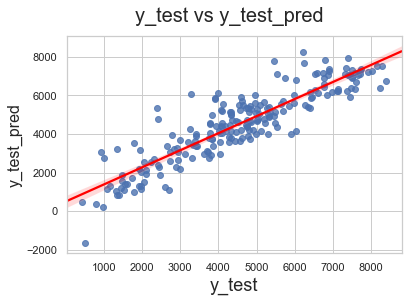

In [94]:
fig = plt.figure()
sns.regplot(y_test,y_test_pred, line_kws={"color": "red"})
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

The y_test_pred and y_pred moves closely with eachother  

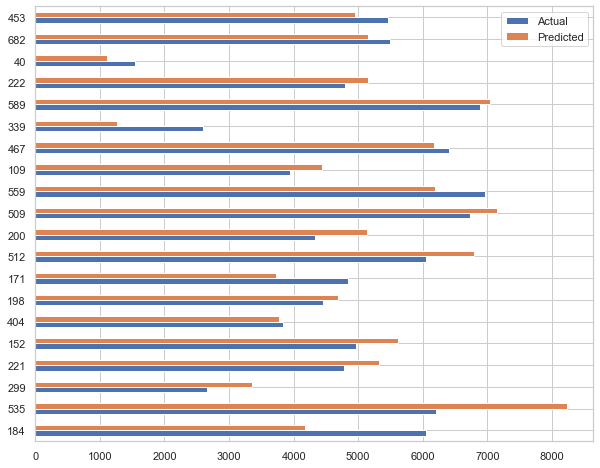

In [90]:
## Plotting y_test and y_test_pred
df_act_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_act_pred.head(20).plot(kind='barh',figsize=(10,8))

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

In [92]:
print('Mean Absolute Error:',mse )  
print('Mean Squared Error:', r_squared)  

Mean Absolute Error: 724819.2926210021
Mean Squared Error: 0.7980076008457069


In [93]:
 print("for training data")
mean_squared_error(y_train, y_train_pred)
r2_score(y_train, y_train_pred)

for training data


602307.9843940116

0.8416417274131027

### Observation:
1. Our model performs pretty good and can be accepted as the predected and actual moves closely .

### Final Equation 

<b> cnt </b>= `1498.0851` + 1994.2695 `2019` + 465.5211 `workingday` + 4962.0848 `temp` - 1401.8639 `hum`       -1617.3921 `windspeed`  + 781.5361 `summer` + 1222.5460`winter` + 891.2903`Sep` +548.0062`Sat` -2119.8904`Light_Snow` -480.7882`Mist`

### Conclusion 

1. <b>Training details</b>
    Rsquare value for training data is 0.8416417274131027

2. <b>Test details</b>
   Rsquare value for training data is 0.7980076008457069
 
Their difference is less than 5% i.e 4.36 %
This can be considered as a good linear model.

If we need better results we can derive new features combining few features and by building a non linear model as well .
